<a href="https://www.kaggle.com/code/datascientistsohail/autoregressive-distributed-lag-ardl-model?scriptVersionId=112877212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Autoregressive Distributed lag (ARDL) model

The packages to be used

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/simple-world-bank-data/ardl_data.csv


Data reading

In [2]:
df = pd.read_csv('/kaggle/input/simple-world-bank-data/ardl_data.csv')
df.head()

,Unnamed: 0,Year,CO2,GDP,ENC
0,0,1980,2.03,3317.272678,6385
1,1,1981,2.10,3463.234057,6979
2,2,1982,2.06,3583.576902,7233
3,3,1983,2.35,3718.162254,7850
4,4,1984,2.37,3908.417851,8045


In [3]:
data = pd.DataFrame(df, columns = ['Year','CO2', 'GDP','ENC'])
data.head()

,Year,CO2,GDP,ENC
0,1980,2.03,3317.272678,6385
1,1981,2.10,3463.234057,6979
2,1982,2.06,3583.576902,7233
3,1983,2.35,3718.162254,7850
4,1984,2.37,3908.417851,8045


Following cell take the log of the data values. 

In [4]:
data['lnCO2'] = np.log(data['CO2'])
data['lnGDP'] = np.log(data['GDP'])
data['lnENC'] = np.log(data['ENC'])

In [5]:
data.head()

,Year,CO2,GDP,ENC,lnCO2,lnGDP,lnENC
0,1980,2.03,3317.272678,6385,0.708036,8.106898,8.761707
1,1981,2.10,3463.234057,6979,0.741937,8.149958,8.850661
2,1982,2.06,3583.576902,7233,0.722706,8.184117,8.886409
3,1983,2.35,3718.162254,7850,0.854415,8.220985,8.968269
4,1984,2.37,3908.417851,8045,0.862890,8.270888,8.992806


## Correlation of variables
The following matrix show the strong correlation of variables among each other.

In [6]:
data_corr = data[['lnCO2', 'lnGDP', 'lnENC']]
corr_mat = data_corr.corr()
corr_mat

,lnCO2,lnGDP,lnENC
lnCO2,1.000000,0.972339,0.988753
lnGDP,0.972339,1.000000,0.990077
lnENC,0.988753,0.990077,1.000000


## Plots of data to show stationarity or non-stationarity
The following plots show non-stationarity of data

Text(0.5, 1.0, 'The CO2 consumption over the years')

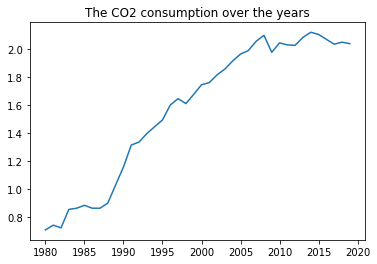

In [7]:
plt.plot( data['Year'], data["lnCO2"])
plt.title("The CO2 consumption over the years")

Text(0.5, 1.0, 'The GDP growth over the years')

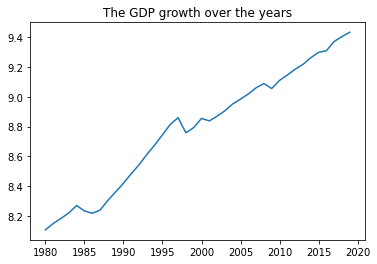

In [8]:
plt.plot( data['Year'], data["lnGDP"])
plt.title("The GDP growth over the years")

Text(0.5, 1.0, 'The Energy consumption over the years')

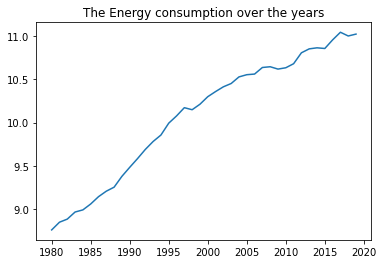

In [9]:
plt.plot( data['Year'], data["lnENC"])
plt.title("The Energy consumption over the years")

### Augmeneted Ducky Fuller (ADF) TEST 
A null hypothesis is given as: 
#### $H_0 $ : Time series is not stationary 
#### $H_1 $ : Time series is stationary 


### The following code will identify whether the lnCO2 values are stationary or not

In [10]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [11]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [12]:
adf_test(data['lnCO2'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.072976
p-value                         0.255519
#Lags Used                      0.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [13]:
kpss_test(data['CO2'])

Results of KPSS Test:
Test Statistic           0.86763
p-value                  0.01000
Lags Used                4.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


### The following code will identify whether the lnGDP values are stationary or not

In [14]:
adf_test(data['lnGDP'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.493955
p-value                         0.893191
#Lags Used                      0.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [15]:
kpss_test(data['lnGDP'])

Results of KPSS Test:
Test Statistic           0.894229
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


### The following code will identify whether the lnENC values are stationary or not

In [16]:
adf_test(data['lnENC'])

Results of Dickey-Fuller Test:
Test Statistic                 -2.627576
p-value                         0.087431
#Lags Used                      2.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [17]:
kpss_test(data['lnENC'])

Results of KPSS Test:
Test Statistic           0.881328
p-value                  0.010000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


### THE ARDL Model

setting the exogenous variables

In [18]:
exog = data[["lnGDP", "lnENC"]]

### Model Evaluation

In [19]:
from statsmodels.tsa.api import ARDL
from sklearn.model_selection import train_test_split
#train_data = data[['lnGDP','lnENC']]

#X_train, X_test, y_train, y_test = train_test_split(data[['lnGDP','lnENC']] , data['lnCO2'], test_size=0.33, random_state=42)
#X_train.head()
model = ARDL(data.lnCO2, 2, exog, 2)
ardl_model = model.fit()

## Model Summary

In [20]:
print(ardl_model.summary())

                              ARDL Model Results                              
Dep. Variable:                  lnCO2   No. Observations:                   40
Model:                  ARDL(2, 2, 2)   Log Likelihood                  71.482
Method:               Conditional MLE   S.D. of innovations              0.037
Date:                Sun, 04 Dec 2022   AIC                           -122.965
Time:                        03:06:29   BIC                           -106.589
Sample:                             2   HQIC                          -117.138
                                   40                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5603      0.740      0.758      0.455      -0.952       2.073
lnCO2.L1       0.7726      0.182      4.253      0.000       0.401       1.144
lnCO2.L2       0.0424      0.187      0.226      0.8